In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## initall VIZ

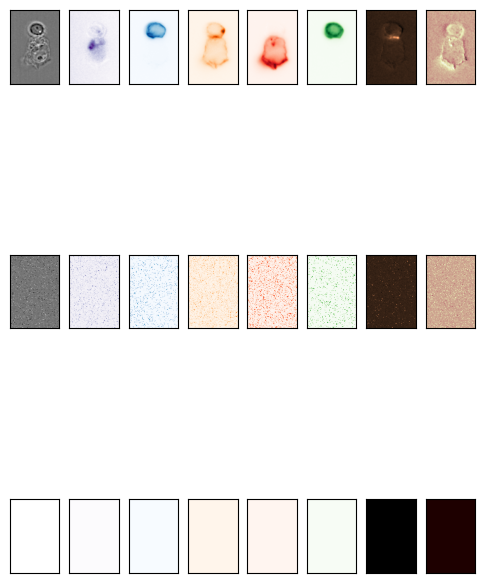

In [2]:
import h5py

colors = ["Greys", "Purples", "Blues", "Oranges", "Reds", "Greens", "copper", "pink"]

image = h5py.File("sample_image/sample_image.h5","r")["image"][()]
num_channels = image.shape[2]
h = image.shape[0]
w = image.shape[1]

fig, ax = plt.subplots(nrows = 3, ncols = num_channels, figsize = (3*2,3*3))

for j in range(num_channels):
    ax[0,j].imshow(image[:,:,j],  cmap = colors[j])
    ax[0,j].set_xticks([])
    ax[0,j].set_yticks([])
    
    ax[1,j].imshow(np.random.permutation(image[:,:,j].ravel()).reshape(h,w),  cmap = colors[j])
    ax[1,j].set_xticks([])
    ax[1,j].set_yticks([])
    
    ax[2,j].imshow(image[:,:,j]*0.,  cmap = colors[j])
    ax[2,j].set_xticks([])
    ax[2,j].set_yticks([])


plt.savefig("sample_image/sample_image_and_permuation.png")
plt.savefig("sample_image/sample_image_and_permuation.svg")

## apoptotic cells

In [3]:
channel_importance = pd.read_csv("apoptotic_cells/channel_importance.csv")
channel_importance.channel = channel_importance.channel.replace({"Ch0":"BF", "Ch1":"FL"})
interpretation_methods = ['PXPermute', "Occlusion",'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']
channel_importance.loc[:, interpretation_methods] = MinMaxScaler().fit_transform(channel_importance.loc[:, interpretation_methods])
channel_importance.head()

,fold,channel,PXPermute,DeepLift,IntegratedGradients,LRP,GuidedGradCAM,Occlusion
0,1,BF,0.020825,0.285036,0.403507,0.386061,0.149481,0.157249
1,1,FL,0.871877,0.072480,0.123839,0.186646,0.113056,0.549806
2,2,BF,0.000000,0.188723,0.205963,0.250545,0.147942,0.070168
3,2,FL,0.849714,0.029331,0.063776,0.203279,0.153033,0.502121
4,3,BF,0.030804,0.433597,0.419174,1.000000,0.172053,0.017330


/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

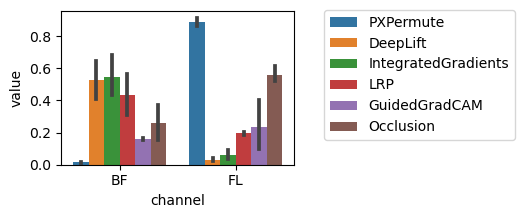

In [4]:

num_channels = len(channel_importance.channel.unique())

fig, ax = plt.subplots(figsize = (1.5*num_channels,2))

ax = sns.barplot(data = pd.melt(channel_importance, id_vars=["fold","channel"]),
                 x = "channel",
                 y = "value",
                 hue = "variable")

ax.legend(bbox_to_anchor=(1.1, 1.05))

In [5]:
for meth in interpretation_methods:
    print(meth,channel_importance.groupby("channel").mean().loc[:,[meth]].sort_values(meth, ascending=False).to_dict()[meth].keys())

PXPermute dict_keys(['FL', 'BF'])
Occlusion dict_keys(['FL', 'BF'])
GuidedGradCAM dict_keys(['FL', 'BF'])
IntegratedGradients dict_keys(['BF', 'FL'])
DeepLift dict_keys(['BF', 'FL'])
LRP dict_keys(['BF', 'FL'])


In [6]:
for meth in interpretation_methods:
    print(channel_importance.groupby("channel").mean().loc[:,[meth]].sort_values(meth, ascending=False).to_dict())

{'PXPermute': {'FL': 0.8865421113413203, 'BF': 0.014424915848705854}}
{'Occlusion': {'FL': 0.5580364010535072, 'BF': 0.2601343695752062}}
{'GuidedGradCAM': {'FL': 0.23521351388651798, 'BF': 0.15912873119287133}}
{'IntegratedGradients': {'BF': 0.547575104631932, 'FL': 0.06171715071538932}}
{'DeepLift': {'BF': 0.5280868717821107, 'FL': 0.0323373754176242}}
{'LRP': {'BF': 0.43341443435061217, 'FL': 0.19465447386021514}}


In [7]:
channel_importance.groupby("channel").mean()[interpretation_methods]

,PXPermute,Occlusion,GuidedGradCAM,IntegratedGradients,DeepLift,LRP
channel,,,,,,
BF,0.014425,0.260134,0.159129,0.547575,0.528087,0.433414
FL,0.886542,0.558036,0.235214,0.061717,0.032337,0.194654


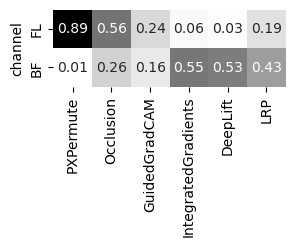

In [8]:
fig,ax = plt.subplots(figsize=(3,1))

order = ['FL', 'BF']
ax = sns.heatmap(channel_importance.groupby("channel").mean()[interpretation_methods].loc[order,:],
                 cmap="Greys",
                 annot=True,
                 fmt=".2f",
                 cbar=False)


plt.savefig("final_figures/apoptotic_cells_channel_importance_mean_value.png" , bbox_inches='tight')
plt.savefig("final_figures/apoptotic_cells_channel_importance_mean_value.svg" , bbox_inches='tight')

In [9]:
channel_importance.channel.unique()

array(['BF', 'FL'], dtype=object)

/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

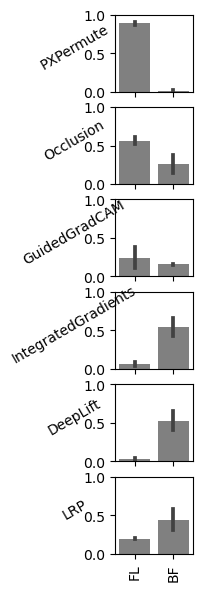

In [10]:
methods = ['PXPermute', "Occlusion",'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = num_methods,figsize = (0.5*num_channels,num_methods+1), sharex = True, sharey = True)

order = ['FL', 'BF']
for j , meth in enumerate(methods):
    
    ax[j] = sns.barplot(data = channel_importance,
                     x = "channel",
                     order = order,
                     y = meth,
                     palette = ["gray"],
                    ax = ax[j])
    
    ax[j].set_ylim(0,1.) 
    ax[j].set_ylabel(meth, rotation = 30)
    ax[j].set_xlabel("")


ax[-1].set_xticklabels(order, rotation = 90)

plt.savefig("final_figures/apoptotic_cells_channel_importance.png" , bbox_inches='tight')
plt.savefig("final_figures/apoptotic_cells_channel_importance.svg" , bbox_inches='tight')

In [11]:
methods = ['PXPermute', "Occlusion",'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']
num_channels_to_train = 1

for met in methods:
    channel = channel_importance.loc[:,["channel",met]].groupby("channel").mean().sort_values(met,ascending=False)
    channel = channel.index.tolist()[:num_channels_to_train]
    print(met, channel)
    print("----")

PXPermute ['FL']
----
Occlusion ['FL']
----
GuidedGradCAM ['FL']
----
IntegratedGradients ['BF']
----
DeepLift ['BF']
----
LRP ['BF']
----


In [12]:

performance = pd.read_csv("apoptotic_cells/results_with_best_channels.csv")

performance = performance[["method",
                           "f1_micro",
                           "f1_macro",
                           "accuracy"]]


/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

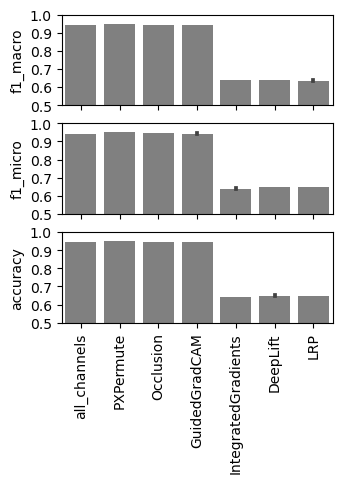

In [13]:
methods = ['all_channels','PXPermute', "Occlusion",'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = 3, figsize = (0.5*num_methods,4), sharex = True, sharey = True)

for j , metr in enumerate(["f1_macro","f1_micro", "accuracy"]):

    ax[j] = sns.barplot(data = performance,
               x = "method", 
                order = methods,
                y = metr,
               palette = ["gray"],
                    ax = ax[j])

    ax[j].set_ylim(0.5,1.)
    ax[j].set_yticks([0.5,0.6,0.7,0.8,0.9,1.])
    ax[j].set_xlabel("")


    
ax[-1].set_xticklabels(methods, rotation = "vertical")    
    


plt.savefig("final_figures/apoptotic_cells_performance.png" , bbox_inches='tight')
plt.savefig("final_figures/apoptotic_cells_performance.svg" , bbox_inches='tight')


In [14]:
metrics = ['f1_macro', 'f1_micro', 'accuracy']

for meth in methods:
    row_index = performance["method"] == meth
    printing_list = [meth, "|||"]
    for metr in metrics:
        printing_list.append(metr)
        printing_list.append(performance.loc[row_index,:].groupby("method").mean().round(2)[metr][0])
        printing_list.append("+-")
        printing_list.append(performance.loc[row_index,:].groupby("method").std().round(2)[metr][0])
        printing_list.append("|")
    print(*printing_list,"\n")

all_channels ||| f1_macro 0.94 +- 0.0 | f1_micro 0.94 +- 0.0 | accuracy 0.94 +- 0.0 | 

PXPermute ||| f1_macro 0.95 +- 0.0 | f1_micro 0.95 +- 0.0 | accuracy 0.95 +- 0.0 | 

Occlusion ||| f1_macro 0.94 +- 0.0 | f1_micro 0.94 +- 0.0 | accuracy 0.94 +- 0.0 | 

GuidedGradCAM ||| f1_macro 0.94 +- 0.0 | f1_micro 0.94 +- 0.0 | accuracy 0.94 +- 0.0 | 

IntegratedGradients ||| f1_macro 0.64 +- 0.01 | f1_micro 0.64 +- 0.01 | accuracy 0.64 +- 0.01 | 

DeepLift ||| f1_macro 0.64 +- 0.01 | f1_micro 0.65 +- 0.01 | accuracy 0.65 +- 0.01 | 

LRP ||| f1_macro 0.64 +- 0.01 | f1_micro 0.65 +- 0.01 | accuracy 0.65 +- 0.01 | 



/tmp/ipykernel_2726830/3510577180.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  printing_list.append(performance.loc[row_index,:].groupby("method").mean().round(2)[metr][0])
/tmp/ipykernel_2726830/3510577180.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  printing_list.append(performance.loc[row_index,:].groupby("method").std().round(2)[metr][0])
/tmp/ipykernel_2726830/3510577180.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

In [15]:
results_with_best_channels = pd.read_csv("apoptotic_cells/results_with_best_channels_remove_bad_channels_and_retrain.csv")

In [16]:
cols = ["Ch0","Ch1"]
results_with_best_channels["num_channels"] = results_with_best_channels.loc[:,cols].astype(int).sum(1)
results_with_best_channels["num_channels"] = 2 - results_with_best_channels["num_channels"]

In [17]:
results_with_best_channels

,method,f1_micro,f1_macro,accuracy,fold_num,Ch0,Ch1,num_channels
0,PXPermute,0.969311,0.968548,0.969311,1,1,1,0
1,PXPermute,0.961149,0.960023,0.961149,2,1,1,0
2,PXPermute,0.965067,0.964111,0.965067,3,1,1,0
3,PXPermute,0.964740,0.963763,0.964740,4,1,1,0
4,PXPermute,0.956252,0.955040,0.956252,5,1,1,0
5,PXPermute,0.955926,0.954953,0.955926,1,0,1,1
6,PXPermute,0.958211,0.957172,0.958211,2,0,1,1
7,PXPermute,0.982697,0.982268,0.982697,3,0,1,1
8,PXPermute,0.960496,0.959577,0.960496,4,0,1,1
9,PXPermute,0.960496,0.959459,0.960496,5,0,1,1


## synapse formation

In [18]:
channel_importance = pd.read_csv("synapse_formation/channel_importance.csv")
interpretation_methods = ['PXPermute', "Occlusion",'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']
channel_importance.loc[:, interpretation_methods] = MinMaxScaler().fit_transform(channel_importance.loc[:, interpretation_methods])


/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

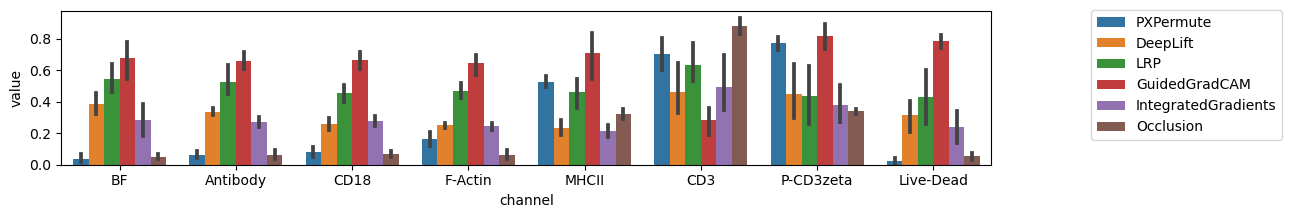

In [19]:

num_channels = len(channel_importance.channel.unique())

fig, ax = plt.subplots(figsize = (1.5*num_channels,2))

ax = sns.barplot(data = pd.melt(channel_importance, id_vars=["fold","channel"]),
                 x = "channel",
                 y = "value",
                 hue = "variable")

ax.legend(bbox_to_anchor=(1.1, 1.05))

In [20]:
for meth in interpretation_methods:
    print(meth,channel_importance.groupby("channel").mean().loc[:,[meth]].sort_values(meth, ascending=False).to_dict()[meth].keys())

PXPermute dict_keys(['P-CD3zeta', 'CD3', 'MHCII', 'F-Actin', 'CD18', 'Antibody', 'BF', 'Live-Dead'])
Occlusion dict_keys(['CD3', 'P-CD3zeta', 'MHCII', 'CD18', 'Antibody', 'F-Actin', 'Live-Dead', 'BF'])
GuidedGradCAM dict_keys(['P-CD3zeta', 'Live-Dead', 'MHCII', 'BF', 'CD18', 'Antibody', 'F-Actin', 'CD3'])
IntegratedGradients dict_keys(['CD3', 'P-CD3zeta', 'BF', 'CD18', 'Antibody', 'F-Actin', 'Live-Dead', 'MHCII'])
DeepLift dict_keys(['CD3', 'P-CD3zeta', 'BF', 'Antibody', 'Live-Dead', 'CD18', 'F-Actin', 'MHCII'])
LRP dict_keys(['CD3', 'BF', 'Antibody', 'F-Actin', 'MHCII', 'CD18', 'P-CD3zeta', 'Live-Dead'])


In [21]:
for meth in interpretation_methods:
    print(channel_importance.groupby("channel").mean().loc[:,[meth]].sort_values(meth, ascending=False).to_dict())

{'PXPermute': {'P-CD3zeta': 0.7732239093700007, 'CD3': 0.7011445960785803, 'MHCII': 0.5260746320541152, 'F-Actin': 0.1607309111370136, 'CD18': 0.07991478894299016, 'Antibody': 0.060730501862933293, 'BF': 0.03702395696767574, 'Live-Dead': 0.02157856017099345}}
{'Occlusion': {'CD3': 0.880560476234273, 'P-CD3zeta': 0.3384398968016236, 'MHCII': 0.3221288153294247, 'CD18': 0.06750688561400701, 'Antibody': 0.06339726027282169, 'F-Actin': 0.060678790917594316, 'Live-Dead': 0.0530208506560564, 'BF': 0.05178678489301043}}
{'GuidedGradCAM': {'P-CD3zeta': 0.8138704281927585, 'Live-Dead': 0.7817334981188837, 'MHCII': 0.711235452016251, 'BF': 0.677140264159959, 'CD18': 0.6643927501042322, 'Antibody': 0.6599368603667584, 'F-Actin': 0.6436899001381853, 'CD3': 0.2828748873806652}}
{'IntegratedGradients': {'CD3': 0.4930229622944885, 'P-CD3zeta': 0.37816424705884405, 'BF': 0.284589816035829, 'CD18': 0.27945934122051896, 'Antibody': 0.2690417993132939, 'F-Actin': 0.24351197763041163, 'Live-Dead': 0.23800

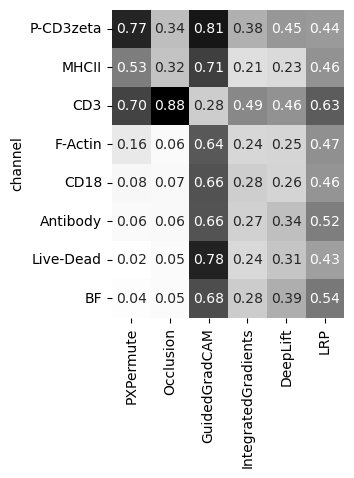

In [22]:
fig,ax = plt.subplots(figsize=(3,4))

order = ['P-CD3zeta','MHCII', 'CD3', 'F-Actin', 'CD18', 'Antibody',  'Live-Dead', 'BF']
ax = sns.heatmap(channel_importance.groupby("channel").mean().loc[order,interpretation_methods],
                 cmap="Greys",
                 annot=True,
                 fmt=".2f",
                 cbar=False)


plt.savefig("final_figures/synapse_formation_channel_importance_mean_value.png" , bbox_inches='tight')
plt.savefig("final_figures/synapse_formation_channel_importance_mean_value.svg" , bbox_inches='tight')

/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

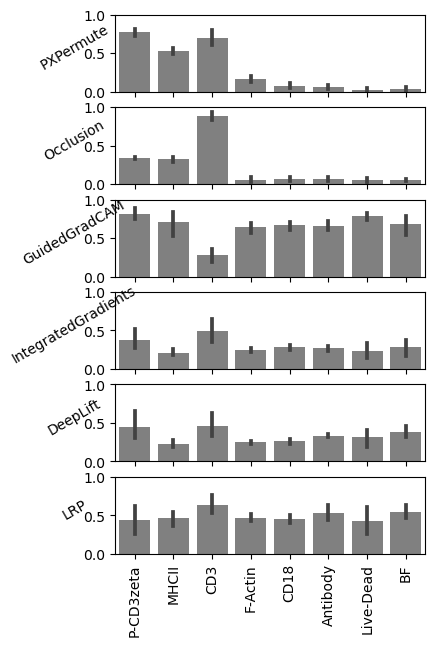

In [23]:
methods = ['PXPermute', "Occlusion",'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = num_methods,figsize = (0.5*num_channels,num_methods+1), sharex = True, sharey = True)

order = ['P-CD3zeta','MHCII', 'CD3', 'F-Actin', 'CD18', 'Antibody',  'Live-Dead', 'BF']
for j , meth in enumerate(methods):
    
    ax[j] = sns.barplot(data = channel_importance,
                     x = "channel",
                     order = order,
                     y = meth,
                     palette = ["gray"],
                    ax = ax[j])
    
    ax[j].set_ylim(0,1.) 
    ax[j].set_ylabel(meth, rotation = 30)
    ax[j].set_xlabel("")


ax[-1].set_xticklabels(order, rotation = 90)

plt.savefig("final_figures/synapse_formation_channel_importance.png" , bbox_inches='tight')
plt.savefig("final_figures/synapse_formation_channel_importance.svg" , bbox_inches='tight')

In [24]:
methods = ['PXPermute', "Occlusion",'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']
num_channels_to_train = 3

for met in methods:
    channel = channel_importance.loc[:,["channel",met]].groupby("channel").mean().sort_values(met,ascending=False)
    channel = channel.index.tolist()[:num_channels_to_train]
    print(met, channel)
    print("----")

PXPermute ['P-CD3zeta', 'CD3', 'MHCII']
----
Occlusion ['CD3', 'P-CD3zeta', 'MHCII']
----
GuidedGradCAM ['P-CD3zeta', 'Live-Dead', 'MHCII']
----
IntegratedGradients ['CD3', 'P-CD3zeta', 'BF']
----
DeepLift ['CD3', 'P-CD3zeta', 'BF']
----
LRP ['CD3', 'BF', 'Antibody']
----


In [25]:

performance = pd.read_csv("synapse_formation/results_with_best_channels.csv")

performance = performance[["method",
                           "f1_macro",
                           "f1_micro",
                           "accuracy"]]


/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

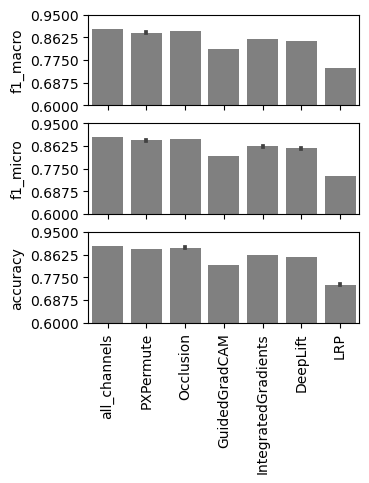

In [26]:
methods = ['all_channels','PXPermute', "Occlusion",'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = 3, figsize = (0.5*num_methods,4), sharex = True, sharey = True)

for j , metr in enumerate(["f1_macro","f1_micro", "accuracy"]):

    ax[j] = sns.barplot(data = performance,
               x = "method", 
                order = methods,
                y = metr,
               palette = ["gray"],
                    ax = ax[j])

    ax[j].set_ylim(0.60,0.95)
    ax[j].set_yticks(np.linspace(0.60,0.95,5))
    ax[j].set_xlabel("")


    
ax[-1].set_xticklabels(methods, rotation = "vertical")    
    



plt.savefig("final_figures/synapse_formation_performance.png" , bbox_inches='tight')
plt.savefig("final_figures/synapse_formation_performance.svg" , bbox_inches='tight')

In [27]:
metrics = ['f1_macro', 'f1_micro', 'accuracy']

for meth in methods:
    row_index = performance["method"] == meth
    printing_list = [meth, "|||"]
    for metr in metrics:
        printing_list.append(metr)
        printing_list.append(performance.loc[row_index,:].groupby("method").mean().round(2)[metr][0])
        printing_list.append("+-")
        printing_list.append(performance.loc[row_index,:].groupby("method").std().round(2)[metr][0])
        printing_list.append("|")
    print(*printing_list,"\n")

all_channels ||| f1_macro 0.89 +- 0.01 | f1_micro 0.9 +- 0.01 | accuracy 0.9 +- 0.01 | 

PXPermute ||| f1_macro 0.88 +- 0.01 | f1_micro 0.88 +- 0.01 | accuracy 0.88 +- 0.01 | 

Occlusion ||| f1_macro 0.89 +- 0.01 | f1_micro 0.89 +- 0.01 | accuracy 0.89 +- 0.01 | 

GuidedGradCAM ||| f1_macro 0.82 +- 0.01 | f1_micro 0.82 +- 0.01 | accuracy 0.82 +- 0.01 | 

IntegratedGradients ||| f1_macro 0.86 +- 0.01 | f1_micro 0.86 +- 0.01 | accuracy 0.86 +- 0.01 | 

DeepLift ||| f1_macro 0.85 +- 0.01 | f1_micro 0.85 +- 0.01 | accuracy 0.85 +- 0.01 | 

LRP ||| f1_macro 0.74 +- 0.01 | f1_micro 0.75 +- 0.01 | accuracy 0.75 +- 0.01 | 



/tmp/ipykernel_2726830/3510577180.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  printing_list.append(performance.loc[row_index,:].groupby("method").mean().round(2)[metr][0])
/tmp/ipykernel_2726830/3510577180.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  printing_list.append(performance.loc[row_index,:].groupby("method").std().round(2)[metr][0])
/tmp/ipykernel_2726830/3510577180.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

## white blood cell

In [28]:
channel_importance = pd.read_csv("white_blood_cells/channel_importance.csv")
interpretation_methods = ['PXPermute', "Occlusion",'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']
channel_importance.loc[:, interpretation_methods] = MinMaxScaler().fit_transform(channel_importance.loc[:, interpretation_methods])


/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

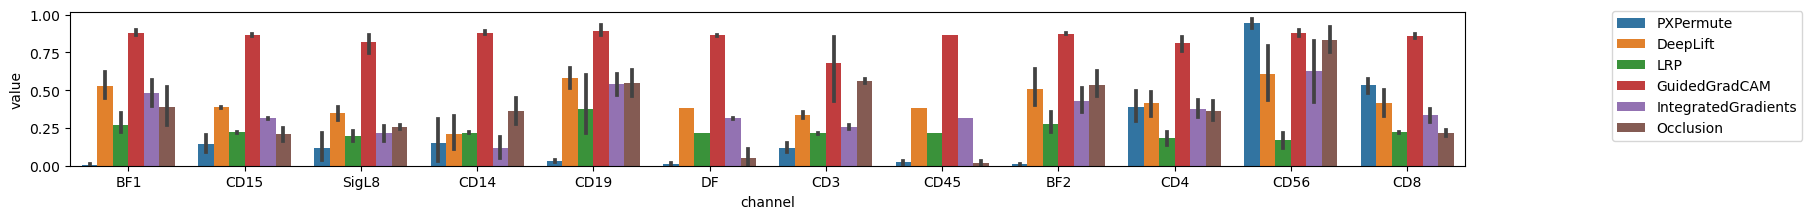

In [29]:

num_channels = len(channel_importance.channel.unique())

fig, ax = plt.subplots(figsize = (1.5*num_channels,2))

ax = sns.barplot(data = pd.melt(channel_importance, id_vars=["fold","channel"]),
                 x = "channel",
                 y = "value",
                 hue = "variable")

ax.legend(bbox_to_anchor=(1.1, 1.05))

In [30]:
for meth in interpretation_methods:
    print(meth,channel_importance.groupby("channel").mean().loc[:,[meth]].sort_values(meth, ascending=False).to_dict()[meth].keys())

PXPermute dict_keys(['CD56', 'CD8', 'CD4', 'CD14', 'CD15', 'CD3', 'SigL8', 'CD19', 'CD45', 'DF', 'BF2', 'BF1'])
Occlusion dict_keys(['CD56', 'CD3', 'CD19', 'BF2', 'BF1', 'CD14', 'CD4', 'SigL8', 'CD8', 'CD15', 'DF', 'CD45'])
GuidedGradCAM dict_keys(['CD19', 'BF1', 'CD14', 'CD56', 'BF2', 'CD45', 'CD15', 'DF', 'CD8', 'SigL8', 'CD4', 'CD3'])
IntegratedGradients dict_keys(['CD56', 'CD19', 'BF1', 'BF2', 'CD4', 'CD8', 'CD45', 'DF', 'CD15', 'CD3', 'SigL8', 'CD14'])
DeepLift dict_keys(['CD56', 'CD19', 'BF1', 'BF2', 'CD8', 'CD4', 'CD15', 'CD45', 'DF', 'SigL8', 'CD3', 'CD14'])
LRP dict_keys(['CD19', 'BF2', 'BF1', 'CD8', 'CD15', 'CD45', 'DF', 'CD14', 'CD3', 'SigL8', 'CD4', 'CD56'])


In [31]:
for meth in interpretation_methods:
    print(channel_importance.groupby("channel").mean().loc[:,[meth]].sort_values(meth, ascending=False).to_dict())

{'PXPermute': {'CD56': 0.9429315512237304, 'CD8': 0.5336696319774419, 'CD4': 0.38548829677958796, 'CD14': 0.15021823779276208, 'CD15': 0.14263966608875495, 'CD3': 0.11987206811702147, 'SigL8': 0.116142849218839, 'CD19': 0.029526782122077082, 'CD45': 0.02147209135989566, 'DF': 0.01225262065896177, 'BF2': 0.010103141822655167, 'BF1': 0.006493896388746803}}
{'Occlusion': {'CD56': 0.8335593303314456, 'CD3': 0.5597820124393862, 'CD19': 0.5475015173913527, 'BF2': 0.5338113896909402, 'BF1': 0.39089147600680263, 'CD14': 0.36443636775348576, 'CD4': 0.3606310197126237, 'SigL8': 0.25481904735892824, 'CD8': 0.21456560379659956, 'CD15': 0.20661023137896112, 'DF': 0.05098294210104317, 'CD45': 0.0186625871678129}}
{'GuidedGradCAM': {'CD19': 0.8945130671953981, 'BF1': 0.8797640275516516, 'CD14': 0.8791641699692729, 'CD56': 0.877410094885516, 'BF2': 0.8737830247979573, 'CD45': 0.8662554731093539, 'CD15': 0.8642078567486919, 'DF': 0.8631092846487085, 'CD8': 0.8612977310104112, 'SigL8': 0.817743600988178

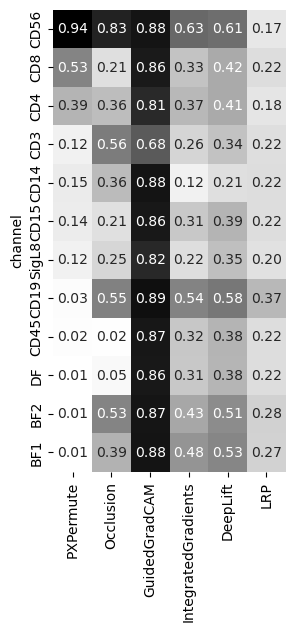

In [32]:
fig,ax = plt.subplots(figsize=(3,6))

order = ['CD56', 'CD8', 'CD4', 'CD3', 'CD14', 'CD15',  'SigL8', 'CD19', 'CD45', 'DF', 'BF2', 'BF1']
ax = sns.heatmap(channel_importance.groupby("channel").mean().loc[order,interpretation_methods],
                 cmap="Greys",
                 annot=True,
                 fmt=".2f",
                 cbar=False)


plt.savefig("final_figures/white_blood_cells_channel_importance_mean_value.png" , bbox_inches='tight')
plt.savefig("final_figures/white_blood_cells_channel_importance_mean_value.svg" , bbox_inches='tight')

/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

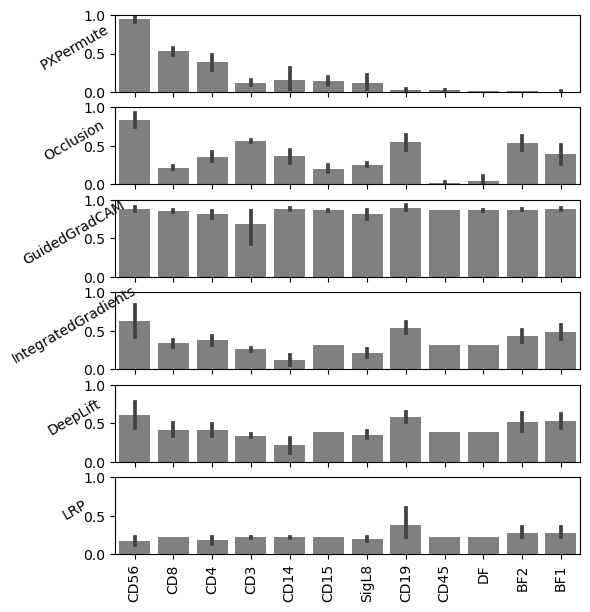

In [33]:
methods = ['PXPermute', "Occlusion",'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

order = ['CD56', 'CD8', 'CD4', 'CD3', 'CD14', 'CD15',  'SigL8', 'CD19', 'CD45', 'DF', 'BF2', 'BF1']

fig, ax = plt.subplots(nrows = num_methods,figsize = (0.5*num_channels,num_methods+1), sharex = True, sharey = True)

for j , meth in enumerate(methods):
    
    ax[j] = sns.barplot(data = channel_importance,
                     x = "channel",
                     order = order,
                     y = meth,
                     palette = ["gray"],
                    ax = ax[j])
    
    ax[j].set_ylim(0,1.) 
    ax[j].set_ylabel(meth, rotation = 30)
    ax[j].set_xlabel("")


ax[-1].set_xticklabels(order, rotation = 90)


plt.savefig("final_figures/white_blood_cells_channel_importance.png" , bbox_inches='tight')
plt.savefig("final_figures/white_blood_cells_channel_importance.svg" , bbox_inches='tight')

In [34]:
methods = ['PXPermute', "Occlusion",'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']
num_channels_to_train = 6

for met in methods:
    channel = channel_importance.loc[:,["channel",met]].groupby("channel").mean().sort_values(met,ascending=False)
    channel = channel.index.tolist()[:num_channels_to_train]
    print(met, channel)
    print("----")

PXPermute ['CD56', 'CD8', 'CD4', 'CD14', 'CD15', 'CD3']
----
Occlusion ['CD56', 'CD3', 'CD19', 'BF2', 'BF1', 'CD14']
----
GuidedGradCAM ['CD19', 'BF1', 'CD14', 'CD56', 'BF2', 'CD45']
----
IntegratedGradients ['CD56', 'CD19', 'BF1', 'BF2', 'CD4', 'CD8']
----
DeepLift ['CD56', 'CD19', 'BF1', 'BF2', 'CD8', 'CD4']
----
LRP ['CD19', 'BF2', 'BF1', 'CD8', 'CD15', 'CD45']
----


In [35]:

performance = pd.read_csv("white_blood_cells/results_with_best_channels.csv")

performance = performance[["method",
                           "f1_macro",
                           "f1_micro",
                           "accuracy"]]


In [36]:
performance

,method,f1_macro,f1_micro,accuracy
0,PXPermute,0.991155,0.996666,0.996666
1,PXPermute,0.985383,0.994832,0.994832
2,PXPermute,0.988926,0.995999,0.995999
3,PXPermute,0.988154,0.995333,0.995333
4,PXPermute,0.989945,0.996499,0.996499
5,DeepLift,0.978516,0.993166,0.993166
6,DeepLift,0.971763,0.991665,0.991665
7,DeepLift,0.972750,0.992332,0.992332
8,DeepLift,0.973513,0.992165,0.992165
9,DeepLift,0.978541,0.993665,0.993665


/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

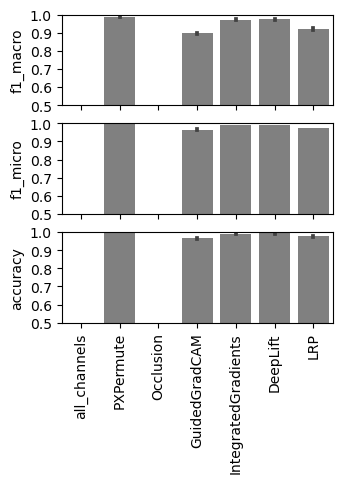

In [37]:
methods = ['all_channels','PXPermute', "Occlusion",'GuidedGradCAM', 'IntegratedGradients',   'DeepLift',  'LRP']


num_channels = len(channel_importance.channel.unique())
num_methods = len(methods)

fig, ax = plt.subplots(nrows = 3, figsize = (0.5*num_methods,4), sharex = True, sharey = True)

for j , metr in enumerate(["f1_macro","f1_micro", "accuracy"]):

    ax[j] = sns.barplot(data = performance,
               x = "method", 
                order = methods,
                y = metr,
               palette = ["gray"],
                    ax = ax[j])

    ax[j].set_ylim(0.5,1.)
    ax[j].set_yticks([0.5,0.6,0.7,0.8,0.9,1.])
    ax[j].set_xlabel("")


    
ax[-1].set_xticklabels(methods, rotation = "vertical")    
    


plt.savefig("final_figures/white_blood_cells_performance.png" , bbox_inches='tight')
plt.savefig("final_figures/white_blood_cells_performance.svg" , bbox_inches='tight')


In [38]:
# metrics = ['f1_macro', 'f1_micro', 'accuracy']

# for meth in methods:
#     row_index = performance["method"] == meth
#     printing_list = [meth, "|||"]
#     for metr in metrics:
#         printing_list.append(metr)
#         printing_list.append(performance.loc[row_index,:].groupby("method").mean().round(2)[metr][0])
#         printing_list.append("+-")
#         printing_list.append(performance.loc[row_index,:].groupby("method").std().round(2)[metr][0])
#         printing_list.append("|")
#     print(*printing_list,"\n")

In [39]:
# plot


In [40]:
apoptotic_results_with_best_channels = pd.read_csv("apoptotic_cells/results_with_best_channels_remove_bad_channels_and_retrain.csv")
synapse_results_with_best_channels = pd.read_csv("synapse_formation/results_with_best_channels_remove_bad_channels_and_retrain.csv")
white_results_with_best_channels = pd.read_csv("white_blood_cells/results_with_best_channels_remove_bad_channels_and_retrain.csv")


In [41]:
row_index = apoptotic_results_with_best_channels.num_channels == 0
row_index = row_index & (apoptotic_results_with_best_channels.method == "PXPermute")
print("mean",
      apoptotic_results_with_best_channels.loc[row_index,"f1_macro"].mean().round(2),
     "std",
     apoptotic_results_with_best_channels.loc[row_index,"f1_macro"].std().round(2))

mean 0.96 std 0.01


In [42]:
apoptotic_results_with_best_channels.groupby("method").mean().round(2).sort_values("f1_macro",ascending=False)

,f1_micro,f1_macro,accuracy,fold_num,Ch0,Ch1,num_channels
method,,,,,,,
GuidedGradCAM,0.97,0.97,0.97,3.0,0.5,1.0,0.5
Occlusion,0.97,0.97,0.97,3.0,0.5,1.0,0.5
PXPermute,0.96,0.96,0.96,3.0,0.5,1.0,0.5
IntegratedGradients,0.83,0.83,0.83,3.0,1.0,0.5,0.5
DeepLift,0.82,0.82,0.82,3.0,1.0,0.5,0.5
LRP,0.82,0.82,0.82,3.0,1.0,0.5,0.5


In [43]:
apoptotic_results_with_best_channels.groupby("method").std().round(2).sort_values("f1_macro",ascending=False)

,f1_micro,f1_macro,accuracy,fold_num,Ch0,Ch1,num_channels
method,,,,,,,
DeepLift,0.15,0.16,0.15,1.49,0.00,0.53,0.53
LRP,0.15,0.16,0.15,1.49,0.00,0.53,0.53
IntegratedGradients,0.15,0.15,0.15,1.49,0.00,0.53,0.53
GuidedGradCAM,0.01,0.01,0.01,1.49,0.53,0.00,0.53
Occlusion,0.01,0.01,0.01,1.49,0.53,0.00,0.53
PXPermute,0.01,0.01,0.01,1.49,0.53,0.00,0.53


In [44]:
synapse_results_with_best_channels.groupby("method").mean().round(2).sort_values("f1_macro",ascending=False)

,f1_micro,f1_macro,accuracy,fold_num,Ch0,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,num_channels
method,,,,,,,,,,,,,
PXPermute,0.92,0.92,0.92,3.0,0.25,0.38,0.50,0.62,0.75,0.88,1.00,0.12,3.5
GuidedGradCAM,0.91,0.90,0.91,3.0,0.62,0.50,0.75,0.25,0.38,0.12,1.00,0.88,3.5
DeepLift,0.89,0.89,0.89,3.0,0.75,0.62,0.38,0.12,0.25,1.00,0.88,0.50,3.5
Occlusion,0.90,0.89,0.90,3.0,0.12,0.25,0.50,0.38,0.75,1.00,0.88,0.62,3.5
IntegratedGradients,0.89,0.88,0.89,3.0,0.75,0.50,0.62,0.38,0.12,1.00,0.88,0.25,3.5
LRP,0.86,0.86,0.86,3.0,0.88,0.75,0.62,0.25,0.50,1.00,0.38,0.12,3.5


In [45]:
synapse_results_with_best_channels.groupby("method").std().round(2).sort_values("f1_macro",ascending=False)

,f1_micro,f1_macro,accuracy,fold_num,Ch0,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,num_channels
method,,,,,,,,,,,,,
LRP,0.08,0.08,0.08,1.43,0.33,0.44,0.49,0.44,0.51,0.00,0.49,0.33,2.32
Occlusion,0.08,0.08,0.08,1.43,0.33,0.44,0.51,0.49,0.44,0.00,0.33,0.49,2.32
DeepLift,0.07,0.07,0.07,1.43,0.44,0.49,0.49,0.33,0.44,0.00,0.33,0.51,2.32
IntegratedGradients,0.07,0.07,0.07,1.43,0.44,0.51,0.49,0.49,0.33,0.00,0.33,0.44,2.32
GuidedGradCAM,0.05,0.05,0.05,1.43,0.49,0.51,0.44,0.44,0.49,0.33,0.00,0.33,2.32
PXPermute,0.04,0.04,0.04,1.43,0.44,0.49,0.51,0.49,0.44,0.33,0.00,0.33,2.32


In [46]:
row_index = synapse_results_with_best_channels.num_channels == 0
row_index = row_index & (synapse_results_with_best_channels.method == "PXPermute")
print("mean",
      synapse_results_with_best_channels.loc[row_index,"f1_macro"].mean().round(2),
     "std",
     synapse_results_with_best_channels.loc[row_index,"f1_macro"].std().round(2))

mean 0.95 std 0.01


In [47]:
white_results_with_best_channels.groupby("method").mean().round(2).sort_values("f1_macro",ascending=False)

,f1_micro,f1_macro,accuracy,fold_num,Ch0,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,Ch9,Ch10,Ch11,num_channels
method,,,,,,,,,,,,,,,,,
DeepLift,0.99,0.97,0.99,3.0,0.83,0.50,0.25,0.08,0.92,0.33,0.17,0.42,0.75,0.58,1.00,0.67,5.5
Occlusion,0.99,0.97,0.99,3.0,0.67,0.25,0.42,0.58,0.83,0.17,0.92,0.08,0.75,0.50,1.00,0.33,5.5
PXPermute,0.99,0.97,0.99,3.0,0.08,0.67,0.50,0.75,0.42,0.25,0.58,0.33,0.17,0.83,1.00,0.92,5.5
IntegratedGradients,0.99,0.96,0.99,3.0,0.83,0.33,0.17,0.08,0.92,0.42,0.25,0.50,0.75,0.67,1.00,0.58,5.5
GuidedGradCAM,0.98,0.94,0.98,3.0,0.92,0.50,0.25,0.83,1.00,0.42,0.08,0.58,0.67,0.17,0.75,0.33,5.5
LRP,0.96,0.90,0.96,3.0,0.83,0.67,0.25,0.42,1.00,0.50,0.33,0.58,0.92,0.17,0.08,0.75,5.5


In [48]:
white_results_with_best_channels.groupby("method").std().round(2).sort_values("f1_macro",ascending=False)

,f1_micro,f1_macro,accuracy,fold_num,Ch0,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,Ch9,Ch10,Ch11,num_channels
method,,,,,,,,,,,,,,,,,
GuidedGradCAM,0.02,0.06,0.02,1.43,0.28,0.50,0.44,0.38,0.00,0.50,0.28,0.50,0.48,0.38,0.44,0.48,3.48
LRP,0.02,0.05,0.02,1.43,0.38,0.48,0.44,0.50,0.00,0.50,0.48,0.50,0.28,0.38,0.28,0.44,3.48
DeepLift,0.01,0.02,0.01,1.43,0.38,0.50,0.44,0.28,0.28,0.48,0.38,0.50,0.44,0.50,0.00,0.48,3.48
IntegratedGradients,0.01,0.02,0.01,1.43,0.38,0.48,0.38,0.28,0.28,0.50,0.44,0.50,0.44,0.48,0.00,0.50,3.48
Occlusion,0.01,0.02,0.01,1.43,0.48,0.44,0.50,0.50,0.38,0.38,0.28,0.28,0.44,0.50,0.00,0.48,3.48
PXPermute,0.01,0.02,0.01,1.43,0.28,0.48,0.50,0.44,0.50,0.44,0.50,0.48,0.38,0.38,0.00,0.28,3.48


In [49]:
row_index = white_results_with_best_channels.num_channels == 0
row_index = row_index & (white_results_with_best_channels.method == "PXPermute")
print("mean",
      white_results_with_best_channels.loc[row_index,"f1_macro"].mean().round(2),
     "std",
     white_results_with_best_channels.loc[row_index,"f1_macro"].std().round(2))

mean 0.98 std 0.0


/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

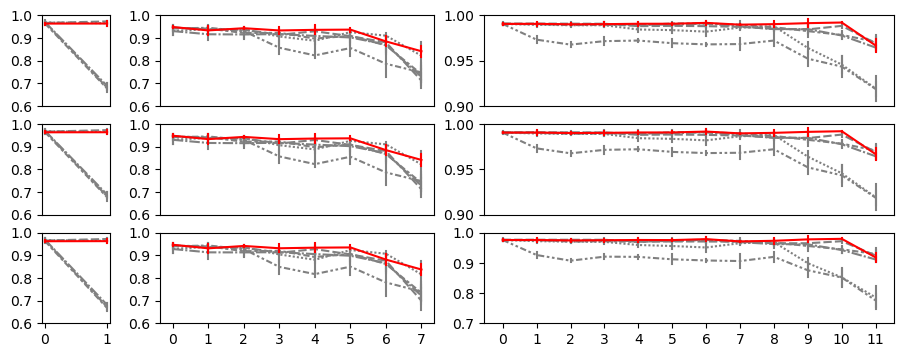

In [50]:

fig, ax = plt.subplots(ncols=3, 
                       nrows=3, 
                       sharey=False,
                       figsize=(11,4), 
                       gridspec_kw={'width_ratios': [2,8,12]})

hue_order=reversed(["PXPermute", "Occlusion", "GuidedGradCAM", "DeepLift", "IntegratedGradients", "LRP"])
hue_order=list(hue_order)
palette=reversed(["red","gray","gray","gray","gray","gray"])
palette=list(palette)

for i,metr in enumerate(["accuracy","f1_micro","f1_macro"]):
    ax[i,0] = sns.lineplot(data = apoptotic_results_with_best_channels, 
                x = "num_channels", 
                y = metr,
                      hue="method",
                       hue_order=hue_order,
                     palette=palette,
                     style="method",
                      style_order=reversed(hue_order),
                      err_style="bars",
                      errorbar=("se", 2),
                     ax=ax[i,0])

    ax[i,0].set_ylim(0.60,1)
    ax[i,0].set_yticks(np.linspace(0.6,1,5))
    ax[i,0].set_ylabel("")
    ax[i,0].set_xticks([])
    ax[i,0].set_xlabel("")
    ax[i,0].legend().remove()

    ax[i,1] = sns.lineplot(data = synapse_results_with_best_channels, 
                x = "num_channels", 
                y = metr,
                      hue="method",
                       hue_order=hue_order,
                     palette=palette,
                     style="method",
                      style_order=reversed(hue_order),
                      err_style="bars",
                      errorbar=("se", 2),
                     ax=ax[i,1])

    ax[i,1].set_ylim(0.6,1)
    ax[i,1].set_yticks(np.linspace(0.6,1,5))
    ax[i,1].set_ylabel("")
    ax[i,1].set_xticks([])
    ax[i,1].set_xlabel("")
    ax[i,1].legend().remove()

    ax[i,2] = sns.lineplot(data = white_results_with_best_channels, 
                x = "num_channels", 
                y = metr,
                      hue="method",
                       hue_order=hue_order,
                     palette=palette,
                     style="method",
                      style_order=reversed(hue_order),
                      err_style="bars",
                      errorbar=("se", 2),
                     ax=ax[i,2])

    #ax[2].set_ylim(0.90,1)
    ax[i,2].set_ylim(0.90,1)
    ax[i,2].set_yticks(np.linspace(0.9,1,3))
    ax[i,2].set_ylabel("")
    ax[i,2].set_xticks([])
    ax[i,2].set_xlabel("")
    ax[i,2].legend().remove()
    

ax[2,2].set_yticks(np.linspace(0.7,1,4))

ax[2,0].set_xticks(range(2))
ax[2,1].set_xticks(range(8))
ax[2,2].set_xticks(range(12))


plt.savefig("final_figures/recursive_channel_elimniation.png" , bbox_inches='tight')
plt.savefig("final_figures/recursive_channel_elimniation.svg" , bbox_inches='tight')

In [51]:
index_ = ["PXPermute", "Occlusion", "GuidedGradCAM", "DeepLift", "IntegratedGradients", "LRP"]
columns_ = [0,1]

f1_macro_apoptotic_results_with_best_channels = pd.DataFrame(columns=columns_,index=index_)


for method in index_:
    for num_channels in columns_:
        row_index = apoptotic_results_with_best_channels["method"] == method
        row_index = row_index & (apoptotic_results_with_best_channels["num_channels"] == num_channels)
        f1_macro_mean = apoptotic_results_with_best_channels.loc[row_index,"f1_macro"].mean()
        f1_macro_mean = format(f1_macro_mean,".2f")
        f1_macro_mean = str(f1_macro_mean)
        f1_macro_std = apoptotic_results_with_best_channels.loc[row_index,"f1_macro"].std()
        f1_macro_std = format(f1_macro_std,".2f")
        f1_macro_std = str(f1_macro_std)
        f1_macro_apoptotic_results_with_best_channels.loc[method,num_channels] = f1_macro_mean +  "±" + f1_macro_std

In [52]:
f1_macro_apoptotic_results_with_best_channels.to_csv("final_figures/f1_macro_apoptotic_results_with_best_channels_recursive_channel_elimniation.csv")

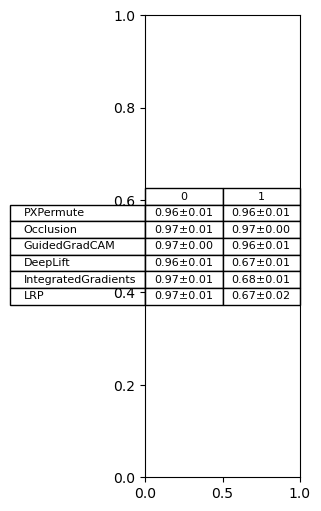

In [53]:
from pandas.plotting import table 

shape = f1_macro_apoptotic_results_with_best_channels.shape

fig, ax = plt.subplots(figsize=(shape[1],shape[0])) # no visible frame


table(ax, f1_macro_apoptotic_results_with_best_channels,loc='center', cellLoc='center', fontsize=8)  # where df is your data frame
plt.savefig("final_figures/f1_macro_apoptotic_results_with_best_channels_recursive_channel_elimniation.png" , bbox_inches='tight')
plt.savefig("final_figures/f1_macro_apoptotic_results_with_best_channels_recursive_channel_elimniation.svg" , bbox_inches='tight')


In [54]:
index_ = ["PXPermute", "Occlusion", "GuidedGradCAM", "DeepLift", "IntegratedGradients", "LRP"]
columns_ = [0,1,2,3,4,5,6,7]

f1_macro_synapse_results_with_best_channels = pd.DataFrame(columns=columns_,index=index_)


for method in index_:
    for num_channels in columns_:
        row_index = synapse_results_with_best_channels["method"] == method
        row_index = row_index & (synapse_results_with_best_channels["num_channels"] == num_channels)
        f1_macro_mean = synapse_results_with_best_channels.loc[row_index,"f1_macro"].mean()
        f1_macro_mean = format(f1_macro_mean,".2f")
        f1_macro_mean = str(f1_macro_mean)
        f1_macro_std = synapse_results_with_best_channels.loc[row_index,"f1_macro"].std()
        f1_macro_std = format(f1_macro_std,".2f")
        f1_macro_std = str(f1_macro_std)
        f1_macro_synapse_results_with_best_channels.loc[method,num_channels] = f1_macro_mean +  "±" + f1_macro_std

In [55]:
f1_macro_synapse_results_with_best_channels.to_csv("final_figures/f1_macro_synapse_results_with_best_channels_recursive_channel_elimniation.csv")

In [56]:
f1_macro_synapse_results_with_best_channels

,0,1,2,3,4,5,6,7
PXPermute,0.95±0.01,0.93±0.02,0.94±0.01,0.93±0.02,0.93±0.02,0.93±0.01,0.88±0.03,0.84±0.03
Occlusion,0.94±0.01,0.94±0.02,0.93±0.01,0.91±0.01,0.93±0.03,0.90±0.03,0.88±0.04,0.70±0.04
GuidedGradCAM,0.93±0.02,0.94±0.01,0.94±0.01,0.90±0.04,0.88±0.07,0.92±0.01,0.91±0.01,0.82±0.07
DeepLift,0.94±0.02,0.94±0.02,0.92±0.03,0.92±0.02,0.89±0.03,0.91±0.01,0.86±0.05,0.73±0.04
IntegratedGradients,0.93±0.02,0.91±0.03,0.91±0.02,0.91±0.00,0.91±0.01,0.90±0.04,0.87±0.04,0.72±0.04
LRP,0.94±0.01,0.94±0.01,0.93±0.01,0.85±0.03,0.82±0.02,0.85±0.04,0.78±0.06,0.74±0.05


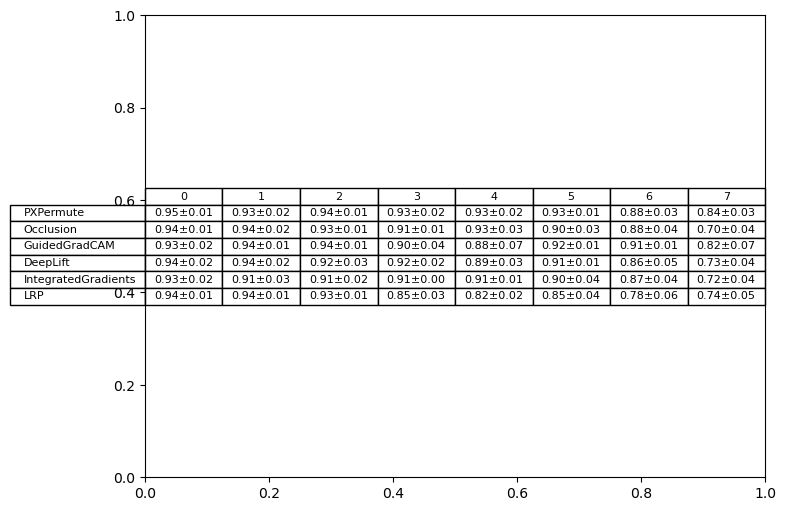

In [57]:
from pandas.plotting import table 

shape = f1_macro_synapse_results_with_best_channels.shape

fig, ax = plt.subplots(figsize=(shape[1],shape[0])) # no visible frame


table(ax, f1_macro_synapse_results_with_best_channels,loc='center', cellLoc='center', fontsize=8)  # where df is your data frame
plt.savefig("final_figures/f1_macro_synapse_results_with_best_channels_recursive_channel_elimniation.png" , bbox_inches='tight')
plt.savefig("final_figures/f1_macro_synapse_results_with_best_channels_recursive_channel_elimniation.svg" , bbox_inches='tight')


In [58]:
index_ = ["PXPermute", "Occlusion", "GuidedGradCAM", "DeepLift", "IntegratedGradients", "LRP"]
columns_ = [0,1,2,3,4,5,6,7,8,9,10,11]

f1_macro_white_results_with_best_channels = pd.DataFrame(columns=columns_,index=index_)


for method in index_:
    for num_channels in columns_:
        row_index = white_results_with_best_channels["method"] == method
        row_index = row_index & (white_results_with_best_channels["num_channels"] == num_channels)
        f1_macro_mean = white_results_with_best_channels.loc[row_index,"f1_macro"].mean()
        f1_macro_mean = format(f1_macro_mean,".2f")
        f1_macro_mean = str(f1_macro_mean)
        f1_macro_std = white_results_with_best_channels.loc[row_index,"f1_macro"].std()
        f1_macro_std = format(f1_macro_std,".2f")
        f1_macro_std = str(f1_macro_std)
        f1_macro_white_results_with_best_channels.loc[method,num_channels] = f1_macro_mean +  "±" + f1_macro_std

In [59]:
f1_macro_white_results_with_best_channels.to_csv("final_figures/f1_macro_white_results_with_best_channels_recursive_channel_elimniation.csv")

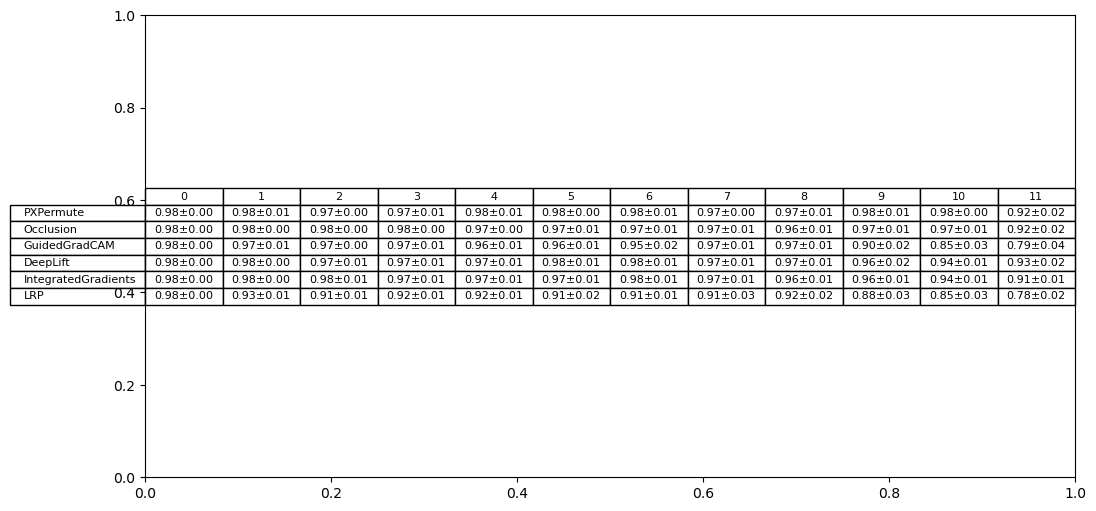

In [60]:
from pandas.plotting import table 

shape = f1_macro_white_results_with_best_channels.shape

fig, ax = plt.subplots(figsize=(shape[1],shape[0])) # no visible frame


table(ax, f1_macro_white_results_with_best_channels,loc='center', cellLoc='center', fontsize=8)  # where df is your data frame
plt.savefig("final_figures/f1_macro_white_results_with_best_channels_recursive_channel_elimniation.png" , bbox_inches='tight')
plt.savefig("final_figures/f1_macro_white_results_with_best_channels_recursive_channel_elimniation.svg" , bbox_inches='tight')


In [61]:
apoptotic_results_with_best_channels.groupby(["method","num_channels"]).median()["f1_macro"]

method               num_channels
DeepLift             0               0.966865
                     1               0.668463
GuidedGradCAM        0               0.967672
                     1               0.957393
IntegratedGradients  0               0.966116
                     1               0.679166
LRP                  0               0.967493
                     1               0.662452
Occlusion            0               0.960112
                     1               0.971164
PXPermute            0               0.963763
                     1               0.959459
Name: f1_macro, dtype: float64

In [62]:
synapse_results_with_best_channels.groupby(["method","num_channels"]).median()["f1_macro"]


method               num_channels
DeepLift             0               0.936922
                     1               0.949257
                     2               0.925081
                     3               0.924788
                     4               0.903718
                     5               0.908386
                     6               0.863728
                     7               0.713566
GuidedGradCAM        0               0.923989
                     1               0.941657
                     2               0.937415
                     3               0.919029
                     4               0.917496
                     5               0.924381
                     6               0.912606
                     7               0.792173
IntegratedGradients  0               0.933730
                     1               0.932127
                     2               0.920926
                     3               0.912926
                     4               0.905358


/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

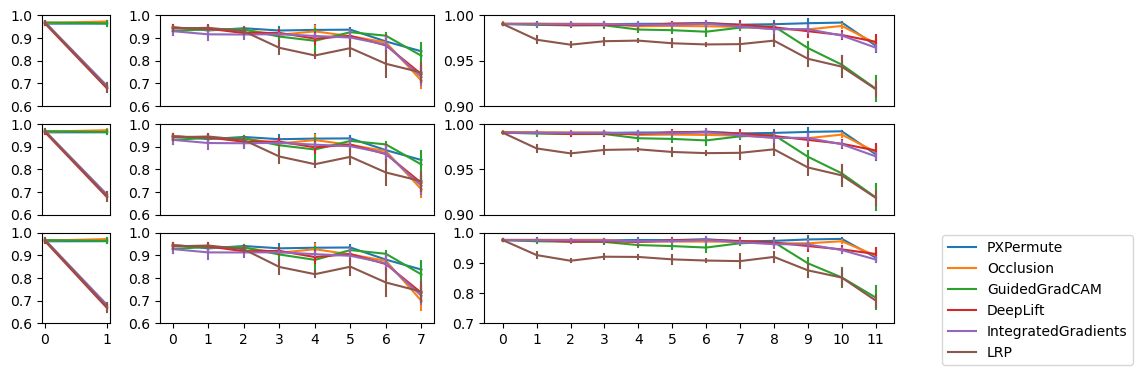

In [63]:

fig, ax = plt.subplots(ncols=3, 
                       nrows=3, 
                       sharey=False,
                       figsize=(11,4), 
                       gridspec_kw={'width_ratios': [2,8,12]})

hue_order=["PXPermute", "Occlusion", "GuidedGradCAM", "DeepLift", "IntegratedGradients", "LRP"]


for i,metr in enumerate(["accuracy","f1_micro","f1_macro"]):
    ax[i,0] = sns.lineplot(data = apoptotic_results_with_best_channels, 
                x = "num_channels", 
                y = metr,
                      hue="method",
                       hue_order=hue_order,
                      err_style="bars",
                      errorbar=("se", 2),
                     ax=ax[i,0])

    ax[i,0].set_ylim(0.60,1)
    ax[i,0].set_yticks(np.linspace(0.6,1,5))
    ax[i,0].set_ylabel("")
    ax[i,0].set_xticks([])
    ax[i,0].set_xlabel("")
    ax[i,0].legend().remove()

    ax[i,1] = sns.lineplot(data = synapse_results_with_best_channels, 
                x = "num_channels", 
                y = metr,
                      hue="method",
                       hue_order=hue_order,
                      err_style="bars",
                      errorbar=("se", 2),
                     ax=ax[i,1])

    ax[i,1].set_ylim(0.6,1)
    ax[i,1].set_yticks(np.linspace(0.6,1,5))
    ax[i,1].set_ylabel("")
    ax[i,1].set_xticks([])
    ax[i,1].set_xlabel("")
    ax[i,1].legend().remove()

    ax[i,2] = sns.lineplot(data = white_results_with_best_channels, 
                x = "num_channels", 
                y = metr,
                      hue="method",
                       hue_order=hue_order,
                      err_style="bars",
                      errorbar=("se", 2),
                     ax=ax[i,2])

    #ax[2].set_ylim(0.90,1)
    ax[i,2].set_ylim(0.90,1)
    ax[i,2].set_yticks(np.linspace(0.9,1,3))
    ax[i,2].set_ylabel("")
    ax[i,2].set_xticks([])
    ax[i,2].set_xlabel("")
    if i < 2:
        ax[i,2].legend().remove()
    else:
        ax[i,2].legend(bbox_to_anchor=(1.1, 1.05))
    

ax[2,2].set_yticks(np.linspace(0.7,1,4))

ax[2,0].set_xticks(range(2))
ax[2,1].set_xticks(range(8))
ax[2,2].set_xticks(range(12))


plt.savefig("final_figures/recursive_channel_elimniation_colored.png" , bbox_inches='tight')
plt.savefig("final_figures/recursive_channel_elimniation_colored.svg" , bbox_inches='tight')

In [64]:
# stain free 

In [65]:
synapse_results_with_stain_free_comparison = pd.read_csv("synapse_formation/results_with_stain_free_comparison.csv")
white_results_with_stain_free_comparison = pd.read_csv("white_blood_cells/results_with_stain_free_comparison.csv")


/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

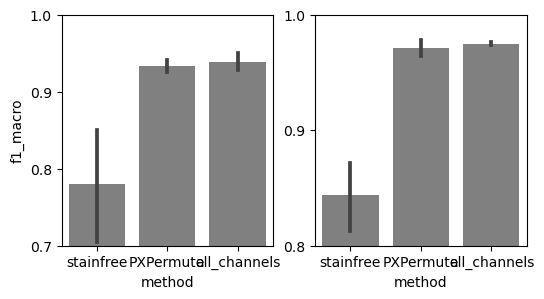

In [66]:
fig, ax = plt.subplots(ncols = 2, figsize=(6,3), sharey=False, sharex=True)

ax[0] = sns.barplot(data = synapse_results_with_stain_free_comparison,
                   x = "method",
                   y = "f1_macro",
                    palette = ["gray"],
                   ax = ax[0])

ax[0].set_ylim(0.7,1.)
ax[0].set_yticks(np.linspace(0.7,1.,4))
              
ax[1] = sns.barplot(data = white_results_with_stain_free_comparison,
                   x = "method",
                   y = "f1_macro",
                    palette = ["gray"],
                   ax = ax[1])

ax[1].set_ylim(0.8,1.)
ax[1].set_yticks(np.linspace(0.8,1.,3))
ax[1].set_ylabel("")

plt.savefig("final_figures/stain_free_comparison.png" , bbox_inches='tight')
plt.savefig("final_figures/stain_free_comparison.svg" , bbox_inches='tight')

In [67]:
synapse_results_with_stain_free_comparison.groupby("method").mean().round(2)["f1_macro"]

method
PXPermute       0.93
all_channels    0.94
stainfree       0.78
Name: f1_macro, dtype: float64

In [68]:
synapse_results_with_stain_free_comparison.groupby("method").std().round(2)["f1_macro"]

method
PXPermute       0.01
all_channels    0.01
stainfree       0.09
Name: f1_macro, dtype: float64

In [69]:
white_results_with_stain_free_comparison.groupby("method").mean().round(2)["f1_macro"]

method
PXPermute       0.97
all_channels    0.97
stainfree       0.84
Name: f1_macro, dtype: float64

In [70]:
white_results_with_stain_free_comparison.groupby("method").std().round(2)["f1_macro"]

method
PXPermute       0.01
all_channels    0.00
stainfree       0.04
Name: f1_macro, dtype: float64

## Run time

Finally here, we show the run time of training algorithm vs pxpermute

In [71]:
run_time = pd.read_csv("run_time.csv").drop("Fold", axis=1)

run_time.groupby(["method"]).mean().divide(60).round(0)

,apoptotic,synapse,white_blood_cell
method,,,
pxpermute,3.0,17.0,65.0
train,6.0,12.0,28.0


In [72]:
run_time.groupby(["method"]).std().divide(60).round(0)

,apoptotic,synapse,white_blood_cell
method,,,
pxpermute,0.0,0.0,10.0
train,1.0,4.0,1.0


In [73]:
run_time = pd.melt(run_time, id_vars="method")
run_time.head()

,method,variable,value
0,train,apoptotic,389
1,train,apoptotic,297
2,train,apoptotic,345
3,train,apoptotic,314
4,train,apoptotic,369


/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shetabs1/miniconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='variable', ylabel='value'>

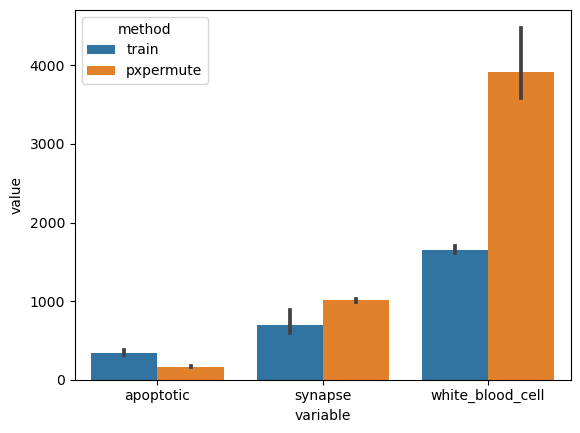

In [74]:
sns.barplot(data = run_time,
           x = "variable", y="value", hue="method")

## parameter k

In [75]:
columns = ['5', '10', '20', '30', '40', '50', '100', '200',
       '500', '1000']

apoptotic_cells_shuffle_order = pd.read_csv("/home/shetabs1/code/MarrLab/scifAI-channel-importance/apoptotic_cells/shuffle_times_results_values1.csv")
apoptotic_cells_shuffle_order = apoptotic_cells_shuffle_order.loc[:,columns] #* 0.0
# for i in range(1,6):
#     apoptotic_cells_shuffle_order = apoptotic_cells_shuffle_order + pd.read_csv("/home/shetabs1/code/MarrLab/scifAI-channel-importance/apoptotic_cells/shuffle_times_results_values" + str(i) + ".csv").loc[:,columns]

# apoptotic_cells_shuffle_order = apoptotic_cells_shuffle_order / 5.

for col in columns:
    arg_order = apoptotic_cells_shuffle_order[col].argsort().values
    arg_order = np.flip(arg_order) + 1
    apoptotic_cells_shuffle_order[col] = arg_order
apoptotic_cells_shuffle_order = apoptotic_cells_shuffle_order.astype(int)
apoptotic_cells_shuffle_order = apoptotic_cells_shuffle_order.sort_values("1000")

synapse_formation_shuffle_order = pd.read_csv("/home/shetabs1/code/MarrLab/scifAI-channel-importance/synapse_formation/shuffle_times_results_values1.csv")
synapse_formation_shuffle_order = synapse_formation_shuffle_order.loc[:,columns] # * 0.0
# for i in range(1,6):
#     synapse_formation_shuffle_order = synapse_formation_shuffle_order + pd.read_csv("/home/shetabs1/code/MarrLab/scifAI-channel-importance/synapse_formation/shuffle_times_results_values" + str(i) + ".csv").loc[:,columns]

# synapse_formation_shuffle_order = synapse_formation_shuffle_order / 5.

for col in columns:
    arg_order = synapse_formation_shuffle_order[col].argsort().values
    arg_order = np.flip(arg_order) + 1
    synapse_formation_shuffle_order[col] = arg_order
synapse_formation_shuffle_order = synapse_formation_shuffle_order.astype(int)
synapse_formation_shuffle_order = synapse_formation_shuffle_order.sort_values("1000")



white_blood_cell_shuffle_order = pd.read_csv("/home/shetabs1/code/MarrLab/scifAI-channel-importance/white_blood_cells/shuffle_times_results_values1.csv")
white_blood_cell_shuffle_order = white_blood_cell_shuffle_order.loc[:,columns] #* 0.0

# for i in range(1,3):
#     white_blood_cell_shuffle_order = white_blood_cell_shuffle_order + pd.read_csv("/home/shetabs1/code/MarrLab/scifAI-channel-importance/white_blood_cells/shuffle_times_results_values" + str(i) + ".csv").loc[:,columns]

# white_blood_cell_shuffle_order = white_blood_cell_shuffle_order / 2.

for col in columns:
    arg_order = white_blood_cell_shuffle_order[col].argsort().values
    arg_order = np.flip(arg_order) + 1
    white_blood_cell_shuffle_order[col] = arg_order
white_blood_cell_shuffle_order = white_blood_cell_shuffle_order.astype(int)
white_blood_cell_shuffle_order = white_blood_cell_shuffle_order.sort_values("1000")

In [76]:
apoptotic_cells_shuffle_order

,5,10,20,30,40,50,100,200,500,1000
1,1,1,1,1,1,1,1,1,1,1
0,2,2,2,2,2,2,2,2,2,2


In [77]:
synapse_formation_shuffle_order

,5,10,20,30,40,50,100,200,500,1000
5,1,1,1,1,3,3,1,1,1,1
4,2,2,2,2,2,2,2,2,2,2
6,3,3,3,3,1,1,3,3,3,3
3,4,4,4,4,4,4,4,4,4,4
0,5,5,5,5,5,5,5,5,5,5
2,6,6,6,6,6,6,6,6,6,6
1,7,7,7,7,7,7,7,7,7,7
7,8,8,8,8,8,8,8,8,8,8


In [78]:
white_blood_cell_shuffle_order

,5,10,20,30,40,50,100,200,500,1000
10,1,1,1,1,1,1,1,1,1,1
5,2,2,2,2,2,2,2,2,2,2
9,3,3,3,3,3,3,3,3,3,3
8,4,4,4,8,4,4,4,4,4,4
6,5,5,5,5,5,5,5,5,5,5
4,6,6,6,6,6,6,6,6,6,6
3,7,7,7,7,7,7,7,7,7,7
7,8,8,8,4,8,8,8,8,8,8
11,9,9,9,9,9,9,9,9,9,9
2,10,10,10,10,10,10,10,10,10,10


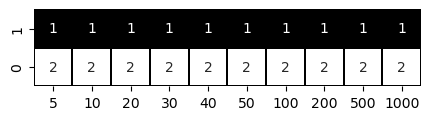

In [79]:
fig,ax = plt.subplots(figsize=(10*0.5,2*0.5))

ax = sns.heatmap(apoptotic_cells_shuffle_order.loc[:,columns],
                 cmap="Greys_r",
                 annot=True,
                 # fmt=".2f",
                 cbar=False,
                 linewidths=0.1, linecolor='black')

plt.savefig("final_figures/apoptotic_cells_shuffle_order.png" , bbox_inches='tight')
plt.savefig("final_figures/apoptotic_cells_shuffle_order.svg" , bbox_inches='tight')

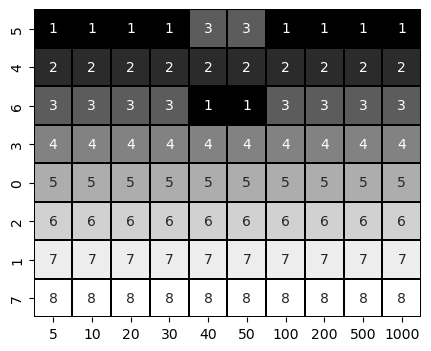

In [80]:
fig,ax = plt.subplots(figsize=(10*0.5,8*0.5))

ax = sns.heatmap(synapse_formation_shuffle_order.loc[:,columns],
                 cmap="Greys_r",
                 annot=True,
                 # fmt=".2f",
                 cbar=False,
                 linewidths=0.1, linecolor='black')

plt.savefig("final_figures/synapse_formation_shuffle_order.png" , bbox_inches='tight')
plt.savefig("final_figures/synapse_formation_shuffle_order.svg" , bbox_inches='tight')

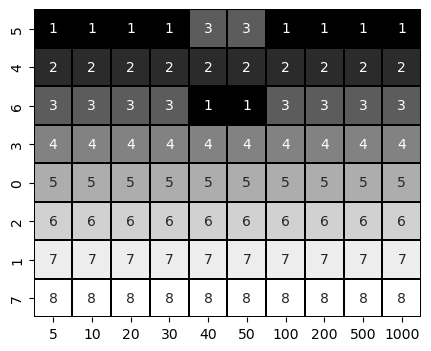

In [81]:
fig,ax = plt.subplots(figsize=(10*0.5,8*0.5))

ax = sns.heatmap(synapse_formation_shuffle_order.loc[:,columns],
                 cmap="Greys_r",
                 annot=True,
                 # fmt=".2f",
                 cbar=False,
                 linewidths=0.1, linecolor='black')

plt.savefig("final_figures/synapse_formation_shuffle_order.png" , bbox_inches='tight')
plt.savefig("final_figures/synapse_formation_shuffle_order.svg" , bbox_inches='tight')

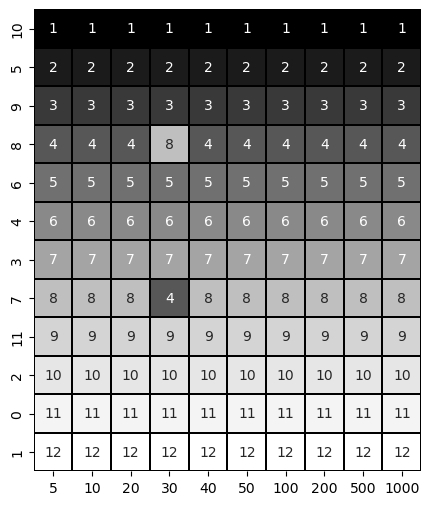

In [82]:
fig,ax = plt.subplots(figsize=(10*0.5,12*0.5))

ax = sns.heatmap(white_blood_cell_shuffle_order.loc[:,columns],
                 cmap="Greys_r",
                 annot=True,
                 # fmt=".2f",
                 cbar=False,
                 linewidths=0.1, linecolor='black')

plt.savefig("final_figures/white_blood_cell_shuffle_order.png" , bbox_inches='tight')
plt.savefig("final_figures/white_blood_cell_shuffle_order.svg" , bbox_inches='tight')

In [90]:
apoptotic_cells_shuffle_order.loc[:,columns].diff().std()

5      NaN
10     NaN
20     NaN
30     NaN
40     NaN
50     NaN
100    NaN
200    NaN
500    NaN
1000   NaN
dtype: float64

In [91]:
synapse_formation_shuffle_order.loc[:,columns].diff().std()

5       0.000000
10      0.000000
20      0.000000
30      0.000000
40      1.380131
50      1.380131
100     0.000000
200     0.000000
500     0.000000
1000    0.000000
dtype: float64

In [89]:
white_blood_cell_shuffle_order.loc[:,columns].diff().std()

5       0.000000
10      0.000000
20      0.000000
30      2.529822
40      0.000000
50      0.000000
100     0.000000
200     0.000000
500     0.000000
1000    0.000000
dtype: float64